In [1]:
import pandas as pd
pokemon = pd.read_csv('Data/pokemon.csv')
pokemon.head(3)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False


In [2]:
pokemon.isnull().sum()

#               0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [3]:
df = pokemon[pokemon['Type 2'].isnull()].loc[:,['Sp. Atk', 'Sp. Def', 'Attack', 'Defense', 'Speed', 'HP', 'Type 1']]
X = df.iloc[:, :-1].values

from sklearn.preprocessing import normalize
X_norm = normalize(X)

y = df.iloc[:, -1].values

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=3)
lda.fit(X_norm, y)

LinearDiscriminantAnalysis(n_components=3)

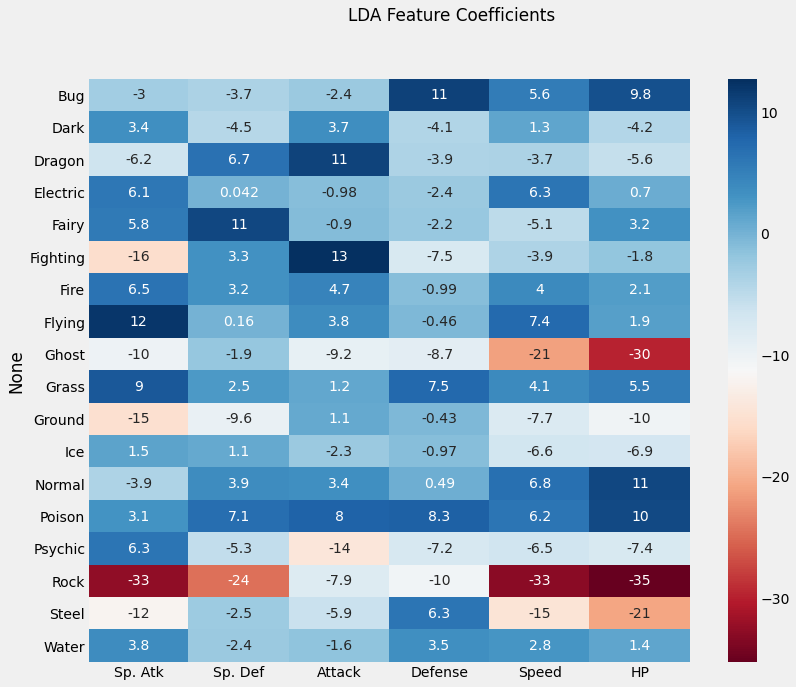

In [5]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

sns.heatmap(pd.DataFrame(lda.coef_, 
                         columns=df.columns[:-1], 
                         index=[lda.classes_]), 
            ax=ax, cmap='RdBu', annot=True)

plt.suptitle('LDA Feature Coefficients')
pass

<AxesSubplot:title={'center':'LDA Class Coefficient Sums'}>

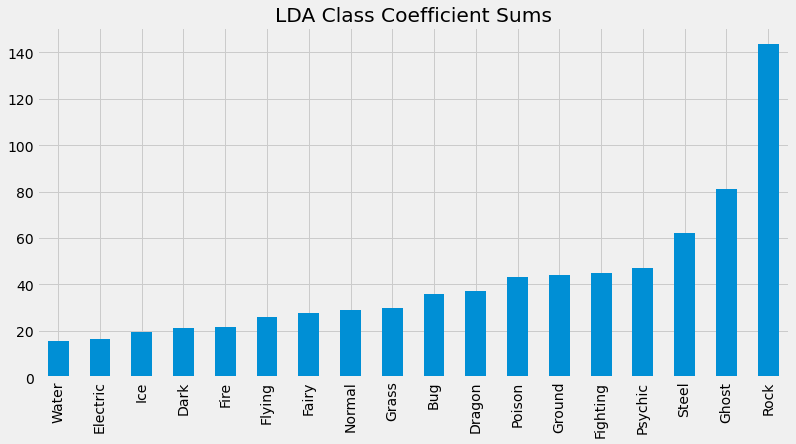

In [6]:
pd.Series(np.abs(lda.coef_).sum(axis=1), index=lda.classes_).sort_values().plot.bar(figsize=(12, 6), title="LDA Class Coefficient Sums")

In [7]:
lda.explained_variance_ratio_

array([0.44685006, 0.27455697, 0.11560072])

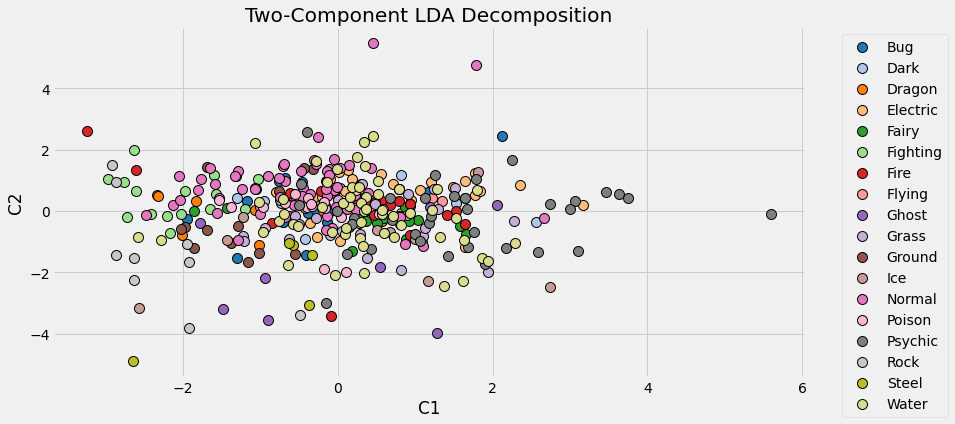

In [8]:
X_hat = lda.fit_transform(X, y)
import matplotlib as mpl

colors = mpl.cm.get_cmap(name='tab20').colors
categories = pd.Categorical(pd.Series(y)).categories
ret = pd.DataFrame({'C1': X_hat[:, 0], 'C2': X_hat[:, 1], 'Type': pd.Categorical(pd.Series(y))})

fig, ax = plt.subplots(1, figsize=(12, 6))

for col, cat in zip(colors, categories):
    (ret.query('Type == @cat').plot.scatter(x='C1', y='C2', color=col, label=cat, ax=ax,
                       s=100, edgecolor='black', linewidth=1,title='Two-Component LDA Decomposition')
         .legend(bbox_to_anchor=(1.2, 1)))